# Introduction 

# Step 0

In [126]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from numpy import linalg as LA
import matplotlib.pyplot as plt

from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

In [127]:
# Step 0
# Load the data 

In [128]:
df = pd.read_csv('./house-prices/houses-prices.csv',index_col=0)

In [129]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 1

In [130]:
# Step 1
# Start to understand them :
#    - In a business way (description, google, ...) 
#    - In a mathematical way (correlation between them, range, mean , type, ...)


## Sale price analyse

In [131]:
# Correlation of all features with the target column " set price" 
df.corr()['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

# De-categorisation 

Transform categoricalvalue into numerical

Indexation of value

In [132]:
# Identify the Categorical features
columns_str=['MSZoning','Street','Alley',
            'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
             'Condition1','Condition2','BldgType','HouseStyle',
            'RoofStyle','RoofMatl','Exterior1st',"Exterior2nd","MasVnrType","ExterQual",
            'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical',
            'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
            'SaleType','SaleCondition']

col_bin=["CentralAir"]

In [133]:
# make a dataframe with the categorical key and the numerical key

str_keys=pd.DataFrame(columns=columns_str)
max_len=0
my_list=[]

#find the max number of unique category
for i in columns_str:
    unique_len=len(df[i].unique())
    if unique_len>max_len:
        max_len=unique_len

#add all value in in matrix format with : categorical value and nan
for i in columns_str:
    temp=[]
    for u in range(max_len):
        if u >= len(df[i].unique()):
            temp.append(np.nan)
        else:
            temp.append(df[i].unique()[u])
    my_list.append(temp)

In [134]:
#the result
np.asarray(my_list)

array([['RL', 'RM', 'C (all)', ..., 'nan', 'nan', 'nan'],
       ['Pave', 'Grvl', 'nan', ..., 'nan', 'nan', 'nan'],
       ['nan', 'Grvl', 'Pave', ..., 'nan', 'nan', 'nan'],
       ...,
       ['nan', 'Shed', 'Gar2', ..., 'nan', 'nan', 'nan'],
       ['WD', 'New', 'COD', ..., 'nan', 'nan', 'nan'],
       ['Normal', 'Abnorml', 'Partial', ..., 'nan', 'nan', 'nan']],
      dtype='<U7')

In [135]:
#create the data frame with all categorcal value
str_keys=pd.DataFrame(columns=columns_str)
for i,u in enumerate(columns_str):
    str_keys[u]=np.asarray(my_list[i])

In [136]:
#the result
str_keys.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
1,RM,Grvl,Grvl,IR1,Bnk,NoSeWa,FR2,Mod,Veenker,Feedr,...,Detchd,Unf,Fa,Fa,N,Ex,MnPrv,Shed,New,Abnorml
2,C (all),nan,Pave,IR2,Low,nan,Corner,Sev,Crawfor,PosN,...,BuiltIn,Fin,Gd,nan,P,Fa,GdWo,Gar2,COD,Partial
3,FV,nan,nan,IR3,HLS,nan,CulDSac,nan,NoRidge,Artery,...,CarPort,nan,nan,Gd,nan,Gd,GdPrv,Othr,ConLD,AdjLand
4,RH,nan,nan,nan,nan,nan,FR3,nan,Mitchel,RRAe,...,nan,nan,Ex,Po,nan,nan,MnWw,TenC,ConLI,Alloca


In [137]:
#replace the categorical value by the index of the value in the data frame
for ind,col in enumerate(df.columns):
    if col in columns_str:
        num=str_keys[col].dropna().index
        val=str_keys[col].dropna().values
        df.iloc[:,ind]=df[col].replace(val,num)
    

In [138]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,0,65.0,8450,0,NaN,0,0,0,0,...,0,NaN,NaN,NaN,0,2,2008,0,0,208500
2,20,0,80.0,9600,0,NaN,0,0,0,1,...,0,NaN,NaN,NaN,0,5,2007,0,0,181500
3,60,0,68.0,11250,0,NaN,1,0,0,0,...,0,NaN,NaN,NaN,0,9,2008,0,0,223500
4,70,0,60.0,9550,0,NaN,1,0,0,2,...,0,NaN,NaN,NaN,0,2,2006,0,1,140000
5,60,0,84.0,14260,0,NaN,1,0,0,1,...,0,NaN,NaN,NaN,0,12,2008,0,0,250000


Now that we have only numerical value we can make an analysis on all our data

In [139]:
df.describe()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,9.478082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,5.837783,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,10.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,13.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,24.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [140]:
df.corr()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.181163,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,-0.123530,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.043191,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
Neighborhood,0.181163,-0.123530,0.043191,1.000000,-0.138913,-0.059568,-0.115600,-0.155964,-0.080062,-0.057656,...,0.007615,-0.097564,0.040012,0.003380,0.006352,-0.009657,0.000339,-0.003504,0.036299,-0.143621
OverallQual,0.032628,0.251646,0.105806,-0.138913,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.059568,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,-0.115600,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,-0.155964,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,-0.080062,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,-0.057656,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


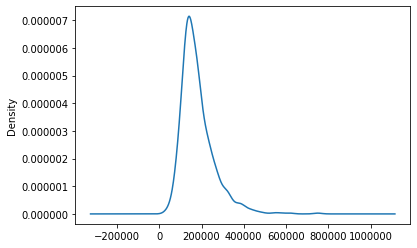

In [141]:
df['SalePrice'].plot.density()

# Step 2

In [142]:
# Step 2
# Choose a problem :
# - Price prediction based on caracteristic (Regression problem)


Comments 

# Step 3

## test on raw data

We have 

In [143]:
# Step 3
# Try a naive way to first get a firstscore (the least with no real improvement) :
#   Use the simplest algorithm
#   Use raw data (no improvement, don't use if it's not fitting)
#   train and score using train test spliting

# measure the performances :
# Score of prediction (choose depending on your probleme, precision or F1)
# time to train
# time to predict

# We will uses theses metrics to track our improvement :

We choose to use a Linear regression which is one of the most basics methode 

We choose to used the linear regression method from sklearn

In [144]:
from sklearn.linear_model import LinearRegression


In [146]:
#formating the data frame
df=df.apply(pd.to_numeric, errors='coerce')
df=df.fillna(0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,0,65.0,8450,0,0.0,0,0,0,0,...,0,0.0,0.0,0.0,0,2,2008,0,0,208500
2,20,0,80.0,9600,0,0.0,0,0,0,1,...,0,0.0,0.0,0.0,0,5,2007,0,0,181500
3,60,0,68.0,11250,0,0.0,1,0,0,0,...,0,0.0,0.0,0.0,0,9,2008,0,0,223500
4,70,0,60.0,9550,0,0.0,1,0,0,2,...,0,0.0,0.0,0.0,0,2,2006,0,1,140000
5,60,0,84.0,14260,0,0.0,1,0,0,1,...,0,0.0,0.0,0.0,0,12,2008,0,0,250000


In [147]:
#split in test and train data set and X Y With X the 80th features and Y the Sale price
df2 = df.copy()

In [148]:
size=len(df)
X_train=np.asarray(df2.drop(columns='SalePrice').iloc[:int(0.7*size),:])
Y_train=np.asarray(df2['SalePrice'].iloc[:int(0.7*size)])

X_test=np.asarray(df2.drop(columns='SalePrice').iloc[int(0.7*size):,:])
Y_test=np.asarray(df2['SalePrice'].iloc[int(0.7*size):])

In [149]:
#Fit the model
reg = LinearRegression().fit(X_train, Y_train)
#test the model
reg.score(X_test, Y_test)


0.5906150615224885

We see that the score is really low, 0.58 is not enought our model isn't good

# Step 4

In [150]:
# Step 4
# Try to reduced the dataset using a naive way (techniques seen in courses 2 - features selections)
# measure the naive algorithm performances on this REDUCED dataset:
# Score of prediction (choose depending on your probleme, precision or F1)
# time to train
# size of reduced dataset

# We will uses theses metrics to track our improvement :

Feature selction using SelectFromModel

In order to keep fetures which really matters for our prediction, we will select only certain fetures thanks to a true or false list. This list would be a naive way of choosing the right to keep. 

We use the SelectFromModel but we could have chosen others. This one is more mathematics. 

We drop first our target. And define it as the target. 

In [151]:
df3 = df.copy()

In [152]:
df3_features = df3.drop(columns='SalePrice')
df3_target = df3['SalePrice']


df3_columns = list(df.columns)
df3_columns2 = df3_columns.remove('SalePrice')
print(df3_columns)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

We apply again the Linear Regression as an estimator. 

In [153]:
# Choose and load the estimator / model
linear_regression_estimator = LinearRegression()

# Load the selector
select_from_model_selector = SelectFromModel(linear_regression_estimator, max_features=5, threshold=-np.inf)

# Fit the selector on data
select_from_model_selector.fit(df3_features, df3_target)



SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=5, norm_order=1, prefit=False, threshold=-inf)

Let's create a new dataframe with the columns corresponding to all the features, their coefficient associated and if they are selected or not (with True or False). 

In [154]:
# Gather the features selected
df3_features_selected = pd.DataFrame(df3_columns,columns=["features"])

# display the coeff, the features and the selected status
df3_features_selected['coeff'] = select_from_model_selector.estimator_.coef_
df3_features_selected['is_selected'] = select_from_model_selector.get_support()


Now, we can see which features would be relevant to select. We observe that these features are the most correlate to the sale price : 
- KitchenAbvGr : kitchens abode grade
- OverallQual : rates the orverall material and finish of the house
- Utilities 
- PoolQC : Pool quality
- Street

In [155]:

df3_features_selected.sort_values('is_selected', ascending = False,inplace=True)
print(df3_features_selected)


         features          coeff  is_selected
51   KitchenAbvGr  -19156.555265         True
4          Street  -35546.432132         True
16    OverallQual   13778.796588         True
8       Utilities  -57438.019312         True
71         PoolQC -189383.616736         True
..            ...            ...          ...
27      ExterCond     -13.469172        False
26      ExterQual    3538.416445        False
25     MasVnrArea      29.194704        False
24     MasVnrType    3963.940674        False
78  SaleCondition     644.828087        False

[79 rows x 3 columns]


Let's try hte RFE on our dataset. The RFE is the recursive feature elimination. It removes each features based on their coef score provide by the estimator (ie LR or SVC) : the feature with the lowest coef is removed. Improvement is'nt based on the model score, but on the model coef calculation : The RFE choice the features depending on model, it's not always relevant. 

In [156]:
# Load the selector on a defined number of feature to select
rfe_selector = RFE(linear_regression_estimator, n_features_to_select=4)
# fit on train set
fited_rfe_selector = rfe_selector.fit(df3_features, df3_target)


In [157]:

df3_features_selected['ranking'] = fited_rfe_selector.ranking_
df3_features_selected.sort_values('ranking', inplace=True)

print(df3_features_selected)

        features          coeff  is_selected  ranking
55    Fireplaces    -268.663609        False        1
53  TotRmsAbvGrd    3712.782908        False        1
71        PoolQC -189383.616736         True        1
47  BsmtHalfBath   -2033.319015        False        1
22   Exterior1st    -702.603469        False        2
..           ...            ...          ...      ...
16   OverallQual   13778.796588         True       72
27     ExterCond     -13.469172        False       73
8      Utilities  -57438.019312         True       74
34  BsmtFinType2   -1798.295698        False       75
42      1stFlrSF      27.088236        False       76

[79 rows x 4 columns]


# Step 5

In [158]:
# Step 5
# based on you first discovery, clean and enhanced data :
#    - convert label into number
#    - add features (calculated from other, look on hide information )
#    -  ...

# Step 6

In [159]:
# Step 6
# Try to improve your SCORE on ENHANCED dataset :
# using your first algorithm
# using other algorithm

# for each model/algorithm, measure the performances :
# Score of prediction (choose depending on your probleme, precision or F1)
# time to train
# size of used dataset

In [160]:
df4 = df.copy()

# we check that there is no nan and inf
df4[~df4.isin([np.nan, np.inf, -np.inf]).any(1)]

# we put everything in float
df4= df4.astype(float)

print(df4)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1           60.0       0.0         65.0   8450.0     0.0    0.0       0.0   
2           20.0       0.0         80.0   9600.0     0.0    0.0       0.0   
3           60.0       0.0         68.0  11250.0     0.0    0.0       1.0   
4           70.0       0.0         60.0   9550.0     0.0    0.0       1.0   
5           60.0       0.0         84.0  14260.0     0.0    0.0       1.0   
...          ...       ...          ...      ...     ...    ...       ...   
1456        60.0       0.0         62.0   7917.0     0.0    0.0       0.0   
1457        20.0       0.0         85.0  13175.0     0.0    0.0       0.0   
1458        70.0       0.0         66.0   9042.0     0.0    0.0       0.0   
1459        20.0       0.0         68.0   9717.0     0.0    0.0       0.0   
1460        20.0       0.0         75.0   9937.0     0.0    0.0       0.0   

In [161]:
df4_features = df4.drop('SalePrice', axis=1)
df4_target = df4['SalePrice']
print(df4_features)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1           60.0       0.0         65.0   8450.0     0.0    0.0       0.0   
2           20.0       0.0         80.0   9600.0     0.0    0.0       0.0   
3           60.0       0.0         68.0  11250.0     0.0    0.0       1.0   
4           70.0       0.0         60.0   9550.0     0.0    0.0       1.0   
5           60.0       0.0         84.0  14260.0     0.0    0.0       1.0   
...          ...       ...          ...      ...     ...    ...       ...   
1456        60.0       0.0         62.0   7917.0     0.0    0.0       0.0   
1457        20.0       0.0         85.0  13175.0     0.0    0.0       0.0   
1458        70.0       0.0         66.0   9042.0     0.0    0.0       0.0   
1459        20.0       0.0         68.0   9717.0     0.0    0.0       0.0   
1460        20.0       0.0         75.0   9937.0     0.0    0.0       0.0   

We drop the columns if the present the same values

In [36]:
#df4_features = df4.drop('MSZoning')
#, 'SaleType', 'Street', 'Alley', 'LandContour', 'Utilities','LandSlope'

In [37]:
#using linalg from numpy, extract the eigen values from the avocado dataset

values = LA.eigvals(df4_features.corr())



LinAlgError: Array must not contain infs or NaNs

In [38]:
# using Matplotlib or Seaborn, draw a scree plot of the previous calculated eigen values

plt.scatter(range(1,values.size+1),values)
plt.plot(range(1,values.size+1),values)
plt.hlines(1, 0, values.size, colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


NameError: name 'values' is not defined

How many to keep if we want to reduce the dataset?

In [119]:
df4_features_columns = list(df4_features.columns)

# use the train_test_split function to create 4 dataset :
# avocado_features_train, avocado_features_test, avocado_target_train, avocado_target_test
df4_features_train, df4_features_test, df4_target_train, df4_target_test = train_test_split(df4_features, df4_target, test_size=0.20, random_state=42)

# initiate the LinearSVC model
linear_svc_model = LinearSVC()
# fit the data on the train data and target
linear_svc_model.fit(df4_features_train,df4_target_train)
#Score the prediction score on the test data and target
print(linear_svc_model.score(df4_features_test,df4_target_test))

df4_target_predicted = linear_svc_model.predict(df4_features_test)

print(f1_score(df4_target_test, df4_target_predicted, average='weighted'))


0.0
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 In this contexte, the algorithm doesn't perform well
The linear SVC use distance calculation to perform its prediction.
we are going to normalize or data in order to reduce the value of the distance


In [123]:

# use the StandardScaler to remove the mean and scaling data to unit variance
scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(df4_features)
#removing the mean and scaling to unit variance
scaled_df4_features = scaler.transform(df4_features)

# Do the procedure to create the 4 datasets, train the model and score its prediction

scaled_df4_features_train, scaled_df4_features_test, df4_target_train, df4_target_test = train_test_split(scaled_df4_features, df4_target, test_size=0.20, random_state=42)

linear_svc_model = LinearSVC()
linear_svc_model.fit(scaled_df4_features_train,df4_target_train)


print(linear_svc_model.score(scaled_df4_features_test,df4_target_test))


print(f1_score(df4_target_test,linear_svc_model.predict(scaled_df4_features_test),average='weighted'))


0.0
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [125]:
# Now that we have a score for comparaison, we are going to reduced the dataset using the factor
# and we are going to score the prediction using the reduced data set

# use the StandardScaler to remove the mean and scaling data to unit variance
scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(df4_features)
#removing the mean and scaling to unit variance
scaled_df4_features = scaler.transform(df4_features)

# create the FactorAnalysis and fit it on the dataset in order to have a new dataset with only 6 columns
factor_analysis_df4 = FactorAnalysis(n_components = 6).fit(scaled_df4_features)
# create a transformed_scaled_avocado_features dataset using the FactorAnalysis previously created
transformed_scaled_df4_features = factor_analysis_df4.transform(scaled_df4_features)

# Do the procedure to create the 4 datasets, train the model and score its prediction
transformed_scaled_df4_features_train, transformed_scaled_df4_features_test, df4_target_train, df4_target_test = train_test_split(transformed_scaled_df4_features, df4_target, test_size=0.20, random_state=42)

linear_svc_model = LinearSVC()
linear_svc_model.fit(transformed_scaled_df4_features_train,df4_target_train)

#print(linear_svc_model.score(transformed_scaled_avocado_features_test,avocado_target_test))

print(f1_score(df4_target_test, linear_svc_model.predict(transformed_scaled_df4_features_test), average='weighted'))


# what do you think about this score compare to the 'optimal' one ?



0.0018873668188736682


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Step 7

# step 7 : PCA

In [103]:
# Step 7
# Try to reduced the dataset using a smarter technique (SVD, FA, PCA)
# Try to improve your SCORE, TIME TRAINED on ENHANCED dataset :
# using your first algorithm
# using other algorithm

# for each model/algorithm, measure the performances with your REDUCED dataset:
# Score of prediction (choose depending on your probleme, precision or F1)
# time to train
# size of reduced dataset

In [162]:
from sklearn.decomposition import PCA
from numpy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [163]:
#fist step clean the data
def clean(x):
    if x == 'N':
        return 0
    else :
        return 1

In [164]:
#fill na
df['CentralAir']=df['CentralAir'].apply(clean)
df=df.fillna(0)


In [165]:
# To make a good PCA we firt need to center and reduce the data
#this is a standard decomposition to have a normal centred reduced density of value aroud 0 
#with this the PCA will be much more efficient.


for i in df.columns:
    df[i]=df[i]-df[i].mean()
    df[i]=df[i]/df[i].var()

In [222]:
#Prepare X
df_temp=df.drop(columns="SalePrice")

In [226]:
#Format X
X=[]
df_temp=df_temp.fillna(0)
for i in df_temp.columns:
    new_array = np.asarray(df_temp[i]).astype(type('float', (float,), {}))
    X.append(new_array)
type(new_array[0])


float

In [228]:
X=np.asarray(X).T

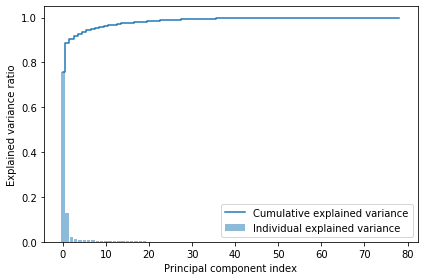

In [229]:
#
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)

pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can see that the 2 first componnent are equale to 85% of the explain variable and the other are really small against them so we choose to decompse our matrix In 2 dimention

In [238]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

In [239]:
#separe Train test

In [240]:
X_train=X_transformed[:int(len(X_transformed)*0.7)]
X_test=X_transformed[int(len(X_transformed)*0.7):]

Y_train=df.iloc[:int(len(X_transformed)*0.7),79]
Y_test=df.iloc[int(len(X_transformed)*0.7):,79]

In [241]:
#model regressor linear

In [242]:
#Fit the model
reg = LinearRegression().fit(X_train, Y_train)
#test the model
reg.score(X_test, Y_test)


0.00037642454361030975

The score is really really really bad

# Step 8

In [ ]:
# Step 8 
# Choose the best reduced algorithm based on metrics (score, time computing, size)
# Explain the business signification for any feature/Factor/Component of this reduced data set

# Step 9

In [ ]:
# Step 9
# Go back to step 5 and improve yout metrics !

# Step 10

In [ ]:
# Step 10

# find a way to present the work you did (video, notebook, powerpoint presentation, app, ...)